In [1]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/08


In [2]:
sig_df = pd.read_pickle('Pkl_ips/SC_SUSY_227_5_mchi_60.pkl')
tt_df  = pd.read_pickle('Pkl_ips/SC_ttbar.pkl')
vv_df  = pd.read_pickle('Pkl_ips/SC_VV.pkl')
st_df  = pd.read_pickle('Pkl_ips/SC_ST.pkl')
sat_df = pd.read_pickle('Pkl_ips/SC_SAT.pkl')

<ipython-input-3-45b1c4f4ed7c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


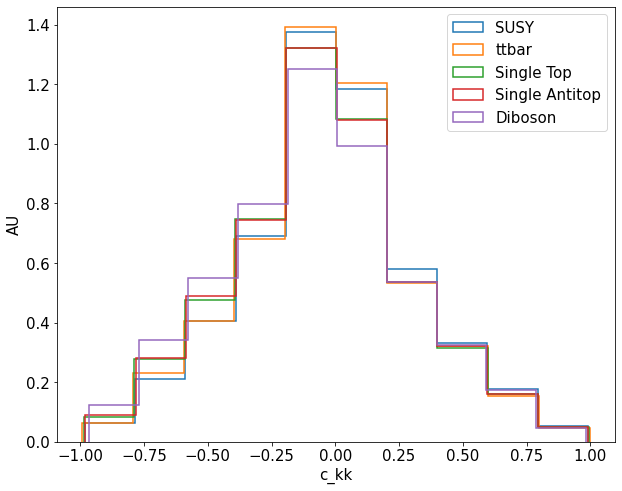

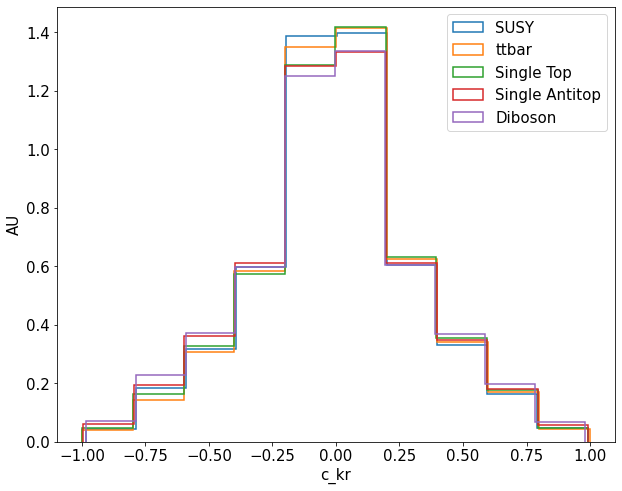

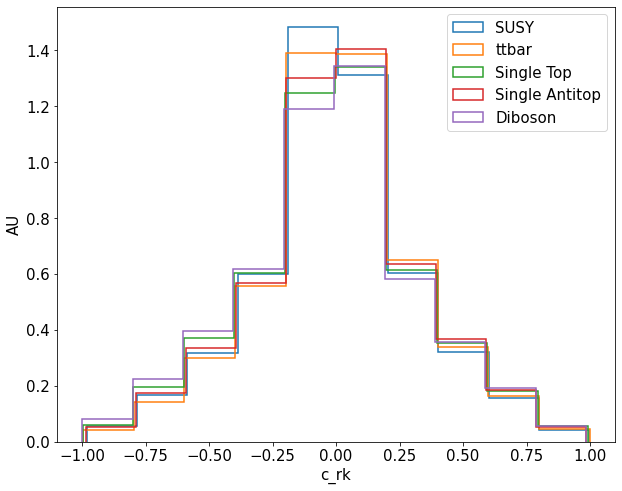

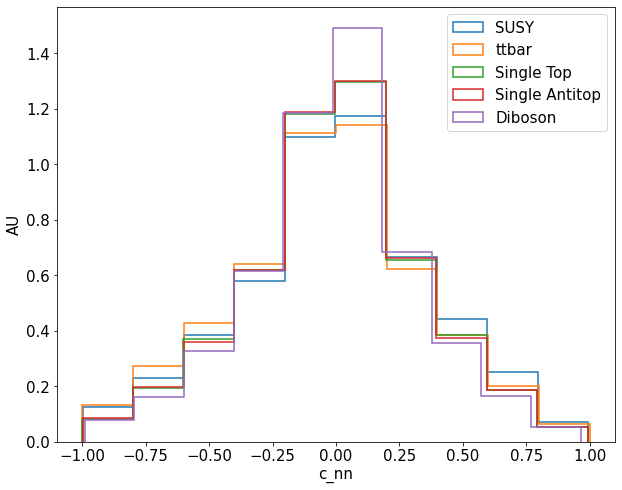

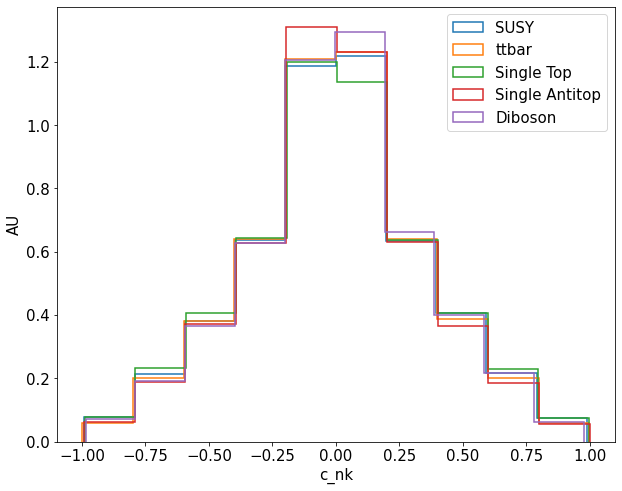

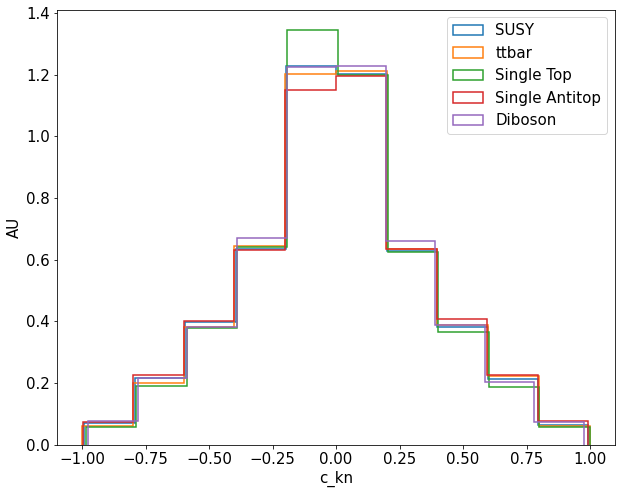

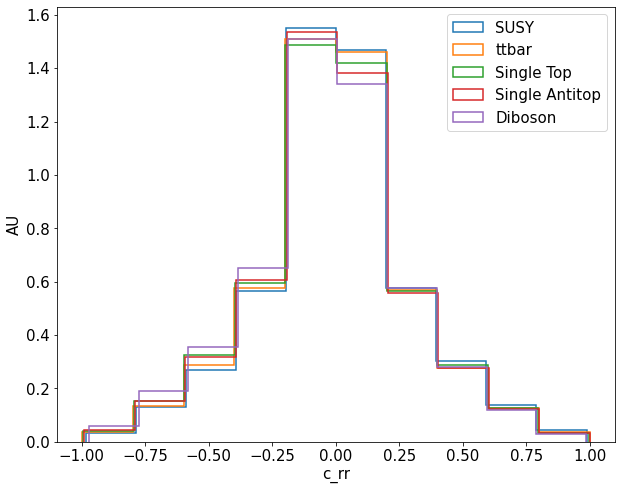

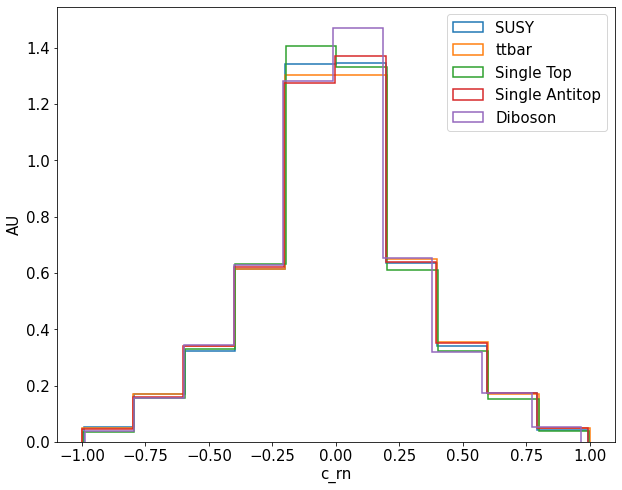

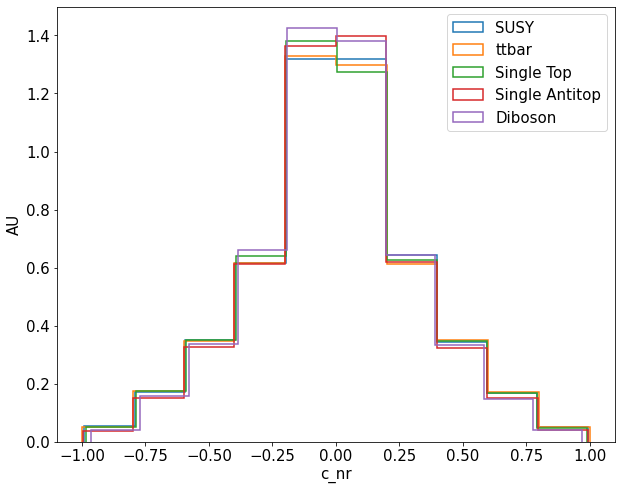

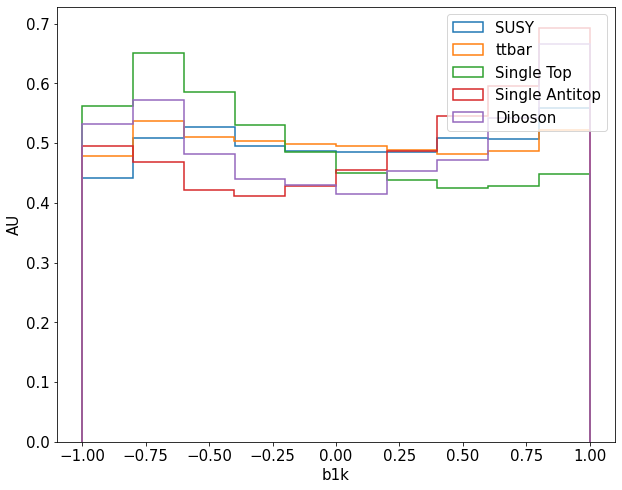

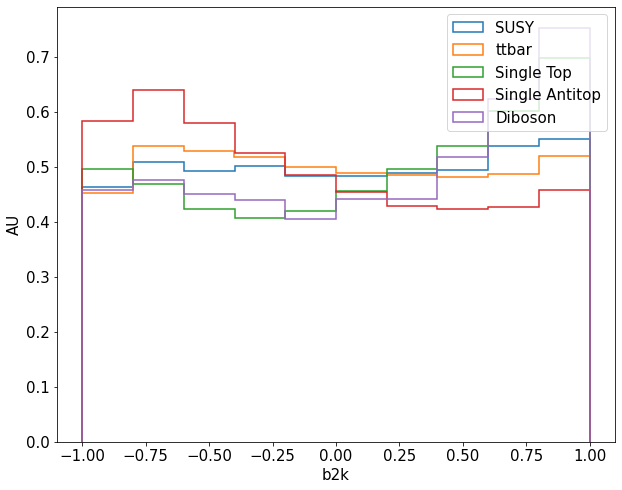

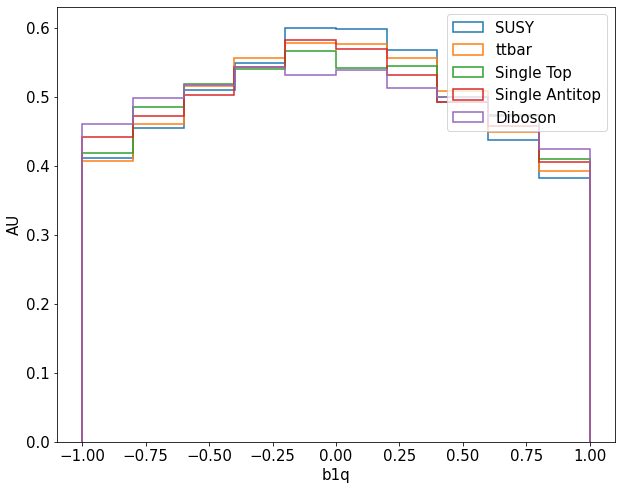

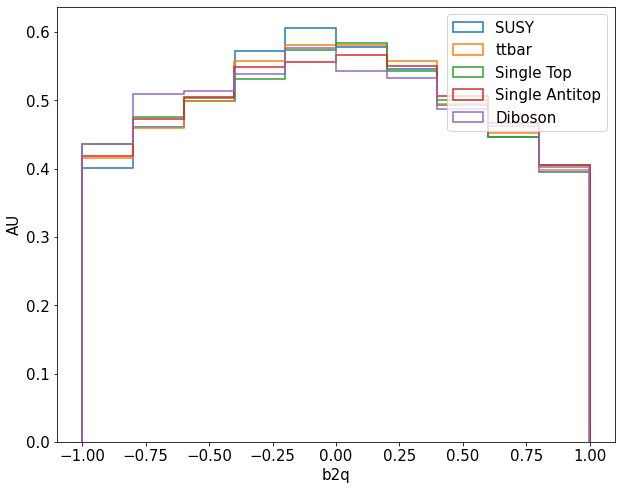

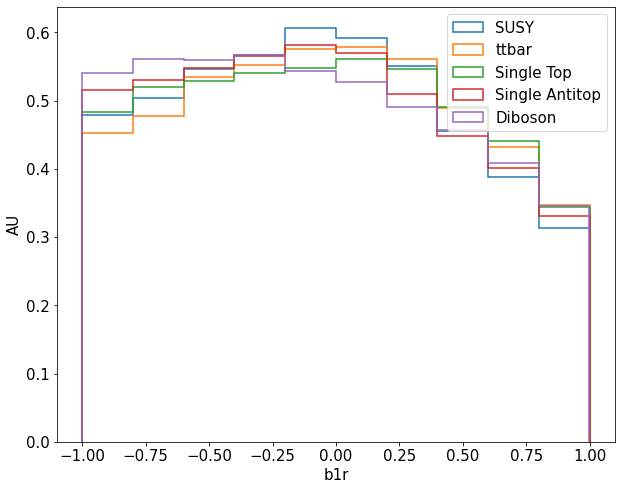

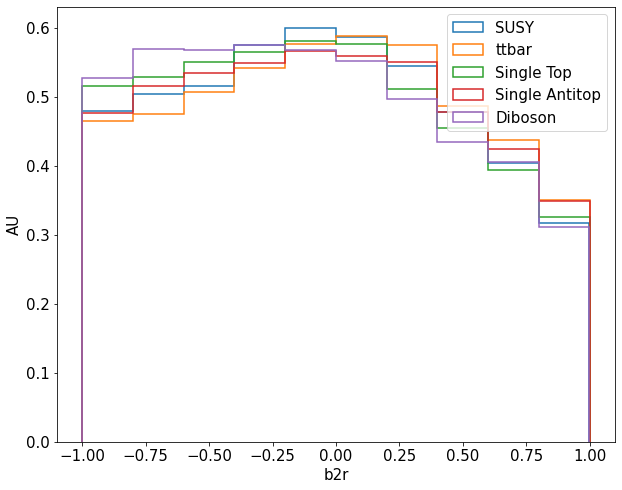

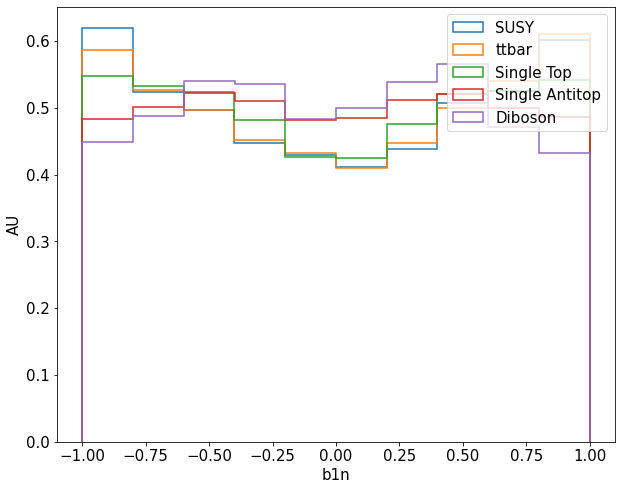

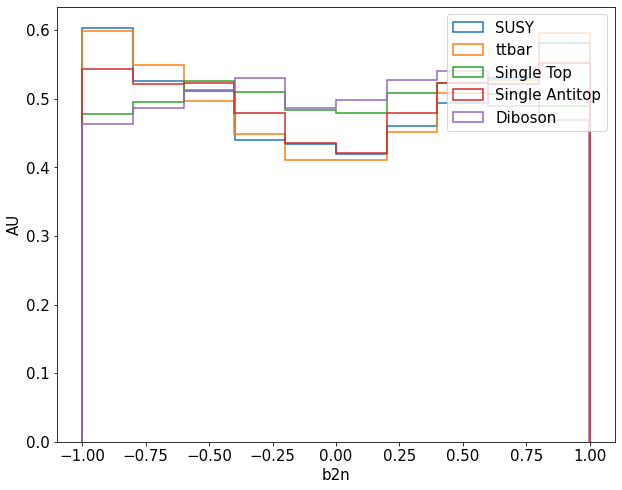

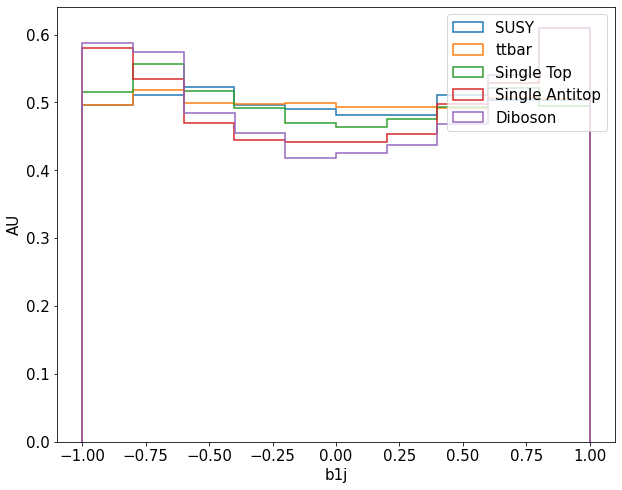

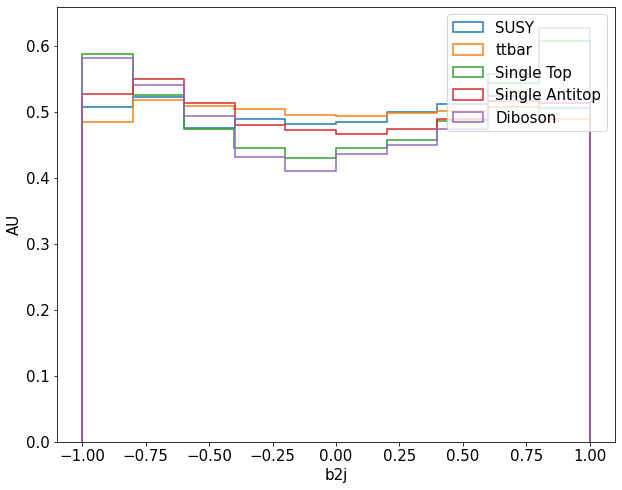

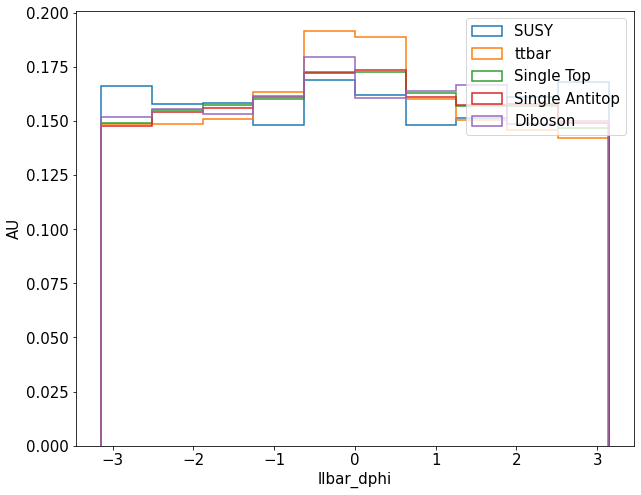

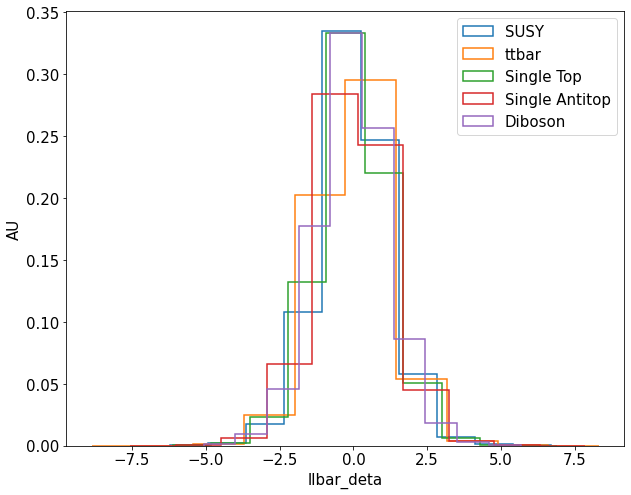

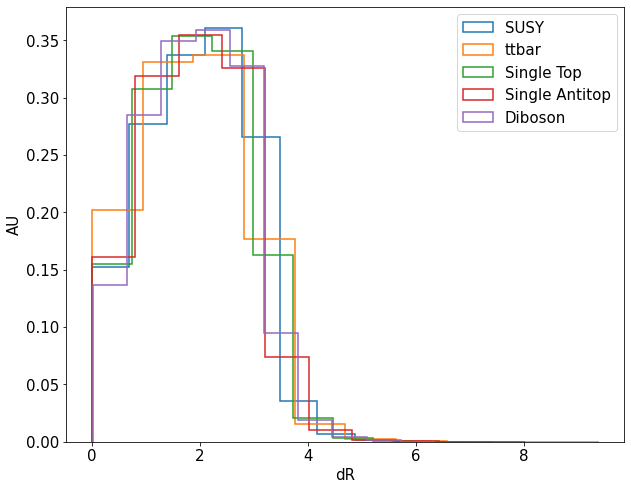

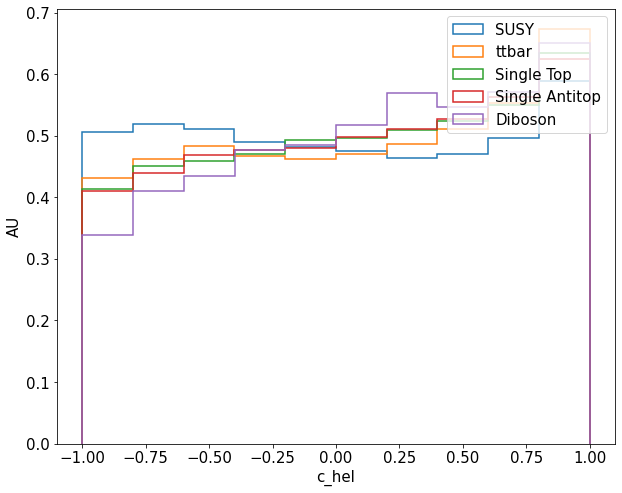

In [3]:
x_labels = sig_df.columns
count    = 0

for i in sig_df.columns :
    plt.figure(figsize=(10,8))
    # Plot the histograms
    plt.hist(sig_df[i], histtype='step', density=True, linewidth=1.5, label='SUSY')
    plt.hist(tt_df[i] , histtype='step', density=True, linewidth=1.5, label='ttbar')
    plt.hist(st_df[i] , histtype='step', density=True, linewidth=1.5, label='Single Top')
    plt.hist(sat_df[i], histtype='step', density=True, linewidth=1.5, label='Single Antitop')
    plt.hist(vv_df[i] , histtype='step', density=True, linewidth=1.5, label='Diboson')
    
    # Formatting
    plt.xlabel(x_labels[count], fontsize=15)
    plt.ylabel('AU', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=15)

    img_name = 'Images/Mstop_227_5_' + str(x_labels[count]) + '.jpg' 
    count   += 1
    plt.savefig(img_name)

In [4]:
# Standardize
sig_mean = sig_df.mean()
sig_std  = sig_df.std()

tt_mean = tt_df.mean()
tt_std  = tt_df.std()

st_mean = st_df.mean()
st_std  = st_df.std()

vv_mean = vv_df.mean()
vv_std  = vv_df.std()

sat_mean = sat_df.mean()
sat_std  = sat_df.std()

sig_df = (sig_df - sig_mean)/ sig_std
tt_df  = (tt_df  - tt_mean)/ tt_std
st_df  = (st_df  - st_mean)/ st_std
vv_df  = (vv_df  - vv_mean)/ vv_std
sat_df = (sat_df  - sat_mean)/ sat_std

In [5]:
# Set both to equal sizes 
# Reducing the bkg dataframe size

sig_df_train = sig_df[1:17000]
tt_df_train  = tt_df[1:35000]
st_df_train  = st_df[1:10000]
sat_df_train = sat_df[1:10000]
vv_df_train  = vv_df[1:2000]

In [6]:
bkgList = [tt_df_train, st_df_train, sat_df_train, vv_df_train]  # List of your dataframes

bkg_df_train = pd.concat(bkgList)

signal = sig_df_train.values
bkg    = bkg_df_train.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))

In [7]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x7ff3f6d1fd60>

In [8]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]

TRAIN: [    0     1     2 ... 73987 73988 73992] TEST: [    8    13    15 ... 73991 73993 73994]
TRAIN: [    8    13    15 ... 73991 73993 73994] TEST: [    0     1     2 ... 73987 73988 73992]


In [9]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [10]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
model.add(Dense(200, input_dim = 23  ,activation='relu'))
model.add(Dropout(0.1))
#model.add(Dense(100, input_dim = 100 ,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               4800      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
_________________________________________________________________


2021-04-04 23:27:52.723262: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-04 23:27:55.562452: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-04 23:27:55.567591: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-04 23:27:55.593320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-04 23:27:55.593596: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1060 3GB computeCapability: 6.1
coreClock: 1.835GHz coreCount: 9 deviceMemorySize: 2.95GiB deviceMemoryBandwidth: 178.99GiB/s
2021-04-04 23:27:55.593649: I tensorflow/stream_executor/platform/defaul

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [12]:
hist = model.fit(x_train, y_train, batch_size=100, epochs=1000,verbose=1, shuffle=True, validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model2.h5', verbose=0)])

Epoch 1/1000
296/296 [==============================] - 1s 3ms/step - loss: 0.5606 - accuracy: 0.7518 - val_loss: 0.5444 - val_accuracy: 0.7665
Epoch 2/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7705 - val_loss: 0.5439 - val_accuracy: 0.7665
Epoch 3/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.7697 - val_loss: 0.5430 - val_accuracy: 0.7665
Epoch 4/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7676 - val_loss: 0.5402 - val_accuracy: 0.7665
Epoch 5/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7677 - val_loss: 0.5372 - val_accuracy: 0.7665
Epoch 6/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5185 - accuracy: 0.7770 - val_loss: 0.5366 - val_accuracy: 0.7665
Epoch 7/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7720 - val_loss: 0.5308 - val_accuracy:

296/296 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8477 - val_loss: 0.3269 - val_accuracy: 0.8431
Epoch 58/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8418 - val_loss: 0.3226 - val_accuracy: 0.8414
Epoch 59/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8494 - val_loss: 0.3159 - val_accuracy: 0.8492
Epoch 60/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8456 - val_loss: 0.3278 - val_accuracy: 0.8358
Epoch 61/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8464 - val_loss: 0.3100 - val_accuracy: 0.8512
Epoch 62/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8498 - val_loss: 0.3114 - val_accuracy: 0.8497
Epoch 63/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8505 - val_loss: 0.3112 - val_accuracy: 0.8407

296/296 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.8910 - val_loss: 0.2206 - val_accuracy: 0.9066
Epoch 114/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8923 - val_loss: 0.2135 - val_accuracy: 0.9136
Epoch 115/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.8976 - val_loss: 0.2152 - val_accuracy: 0.9211
Epoch 116/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8972 - val_loss: 0.2271 - val_accuracy: 0.8966
Epoch 117/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.8948 - val_loss: 0.2141 - val_accuracy: 0.9143
Epoch 118/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.8975 - val_loss: 0.2133 - val_accuracy: 0.9093
Epoch 119/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.2508 - accuracy: 0.8970 - val_loss: 0.2107 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9250 - val_loss: 0.1547 - val_accuracy: 0.9476
Epoch 170/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.9235 - val_loss: 0.1535 - val_accuracy: 0.9522
Epoch 171/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.9218 - val_loss: 0.1479 - val_accuracy: 0.9474
Epoch 172/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9237 - val_loss: 0.1508 - val_accuracy: 0.9481
Epoch 173/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9254 - val_loss: 0.1565 - val_accuracy: 0.9461
Epoch 174/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9248 - val_loss: 0.1512 - val_accuracy: 0.9495
Epoch 175/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9275 - val_loss: 0.1509 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9411 - val_loss: 0.1084 - val_accuracy: 0.9714
Epoch 226/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9436 - val_loss: 0.1108 - val_accuracy: 0.9699
Epoch 227/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9422 - val_loss: 0.1106 - val_accuracy: 0.9696
Epoch 228/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1549 - accuracy: 0.9402 - val_loss: 0.1241 - val_accuracy: 0.9488
Epoch 229/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9437 - val_loss: 0.1111 - val_accuracy: 0.9650
Epoch 230/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9446 - val_loss: 0.1124 - val_accuracy: 0.9568
Epoch 231/1000
296/296 [==============================] - 1s 2ms/step - loss: 0.1515 - accuracy: 0.9431 - val_loss: 0.1154 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9542 - val_loss: 0.0879 - val_accuracy: 0.9742
Epoch 282/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9565 - val_loss: 0.0868 - val_accuracy: 0.9753
Epoch 283/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9548 - val_loss: 0.0874 - val_accuracy: 0.9739
Epoch 284/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9546 - val_loss: 0.0842 - val_accuracy: 0.9778
Epoch 285/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9583 - val_loss: 0.0856 - val_accuracy: 0.9738
Epoch 286/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.9568 - val_loss: 0.0913 - val_accuracy: 0.9707
Epoch 287/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9565 - val_loss: 0.0902 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9664 - val_loss: 0.0676 - val_accuracy: 0.9819
Epoch 338/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.0744 - val_accuracy: 0.9746
Epoch 339/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9633 - val_loss: 0.0724 - val_accuracy: 0.9781
Epoch 340/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9659 - val_loss: 0.0663 - val_accuracy: 0.9827
Epoch 341/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9661 - val_loss: 0.0687 - val_accuracy: 0.9799
Epoch 342/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9658 - val_loss: 0.0686 - val_accuracy: 0.9816
Epoch 343/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9645 - val_loss: 0.0678 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9695 - val_loss: 0.0610 - val_accuracy: 0.9805
Epoch 394/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9700 - val_loss: 0.0563 - val_accuracy: 0.9847
Epoch 395/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9728 - val_loss: 0.0583 - val_accuracy: 0.9823
Epoch 396/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 0.9689 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 397/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0840 - accuracy: 0.9706 - val_loss: 0.0581 - val_accuracy: 0.9818
Epoch 398/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9718 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 399/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0847 - accuracy: 0.9690 - val_loss: 0.0577 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9719 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 450/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9735 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 451/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9725 - val_loss: 0.0523 - val_accuracy: 0.9868
Epoch 452/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9726 - val_loss: 0.0490 - val_accuracy: 0.9861
Epoch 453/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9722 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 454/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9742 - val_loss: 0.0484 - val_accuracy: 0.9874
Epoch 455/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9732 - val_loss: 0.0490 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9753 - val_loss: 0.0452 - val_accuracy: 0.9885
Epoch 506/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 507/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9769 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 508/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9765 - val_loss: 0.0477 - val_accuracy: 0.9836
Epoch 509/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9776 - val_loss: 0.0481 - val_accuracy: 0.9855
Epoch 510/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9758 - val_loss: 0.0506 - val_accuracy: 0.9838
Epoch 511/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9757 - val_loss: 0.0453 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9766 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 562/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9779 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 563/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9804 - val_loss: 0.0450 - val_accuracy: 0.9849
Epoch 564/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9780 - val_loss: 0.0401 - val_accuracy: 0.9897
Epoch 565/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9773 - val_loss: 0.0475 - val_accuracy: 0.9842
Epoch 566/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9777 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 567/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9776 - val_loss: 0.0429 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.9806 - val_loss: 0.0356 - val_accuracy: 0.9912
Epoch 618/1000
296/296 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9797 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 619/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9805 - val_loss: 0.0432 - val_accuracy: 0.9861
Epoch 620/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9791 - val_loss: 0.0411 - val_accuracy: 0.9880
Epoch 621/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9796 - val_loss: 0.0411 - val_accuracy: 0.9868
Epoch 622/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 0.9796 - val_loss: 0.0423 - val_accuracy: 0.9861
Epoch 623/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.0386 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9817 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 674/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9813 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 675/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9811 - val_loss: 0.0371 - val_accuracy: 0.9899
Epoch 676/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9806 - val_loss: 0.0394 - val_accuracy: 0.9872
Epoch 677/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9781 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 678/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9802 - val_loss: 0.0409 - val_accuracy: 0.9868
Epoch 679/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9812 - val_loss: 0.0354 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0536 - accuracy: 0.9805 - val_loss: 0.0361 - val_accuracy: 0.9886
Epoch 730/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9821 - val_loss: 0.0325 - val_accuracy: 0.9907
Epoch 731/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9806 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 732/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9818 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 733/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9821 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 734/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9812 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 735/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9822 - val_loss: 0.0331 - val_accuracy: 

296/296 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9842 - val_loss: 0.0348 - val_accuracy: 0.9877
Epoch 786/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9817 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 787/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9815 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 788/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9837 - val_loss: 0.0335 - val_accuracy: 0.9909
Epoch 789/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9842 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 790/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9813 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 791/1000
296/296 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9826 - val_loss: 0.0336 - val_accuracy: 

2021-04-04 23:29:05.595175: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-04-04 23:29:05.615762: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz


In [75]:
'''
# serialize model to JSON
model_json = model.to_json()
with open("Mstop_182_5_mchi_7_5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Mstop_182_5_mchi_7_5.h5")
print("Saved model to disk")
'''

Saved model to disk


In [17]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Loss' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    plt.title('Cross Entropy Loss by Epoch', fontsize=17)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)

    plt.legend(fontsize=17)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch', fontsize=17)
    plt.ylabel('Accuracy' , fontsize=17)
    plt.tick_params(axis="y", labelsize=15)
    plt.tick_params(axis="x", labelsize=15)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=17)
    plt.show()

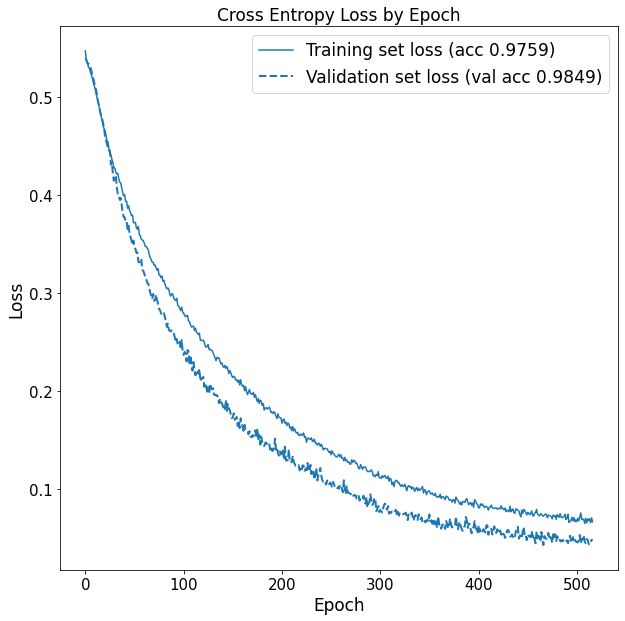

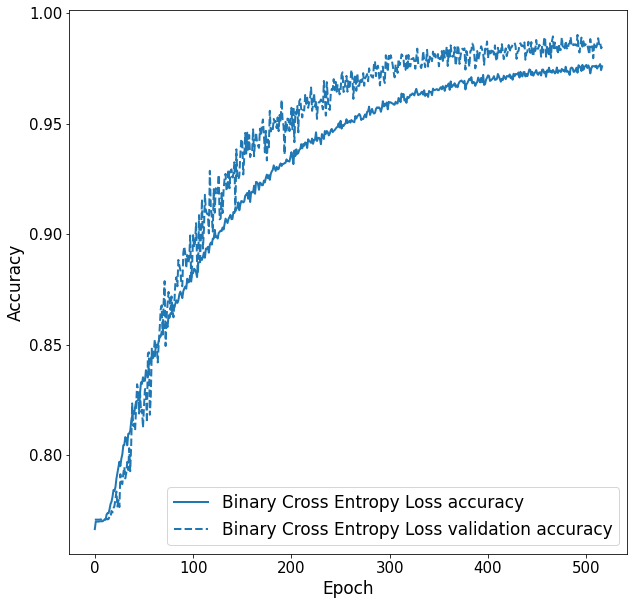

In [58]:
show_losses( [("Binary Cross Entropy Loss", hist)])

In [62]:
from sklearn.metrics import roc_curve
y_pred_train = model.predict(x_train).ravel()
y_pred_test  = model.predict(x_test).ravel()

fpr_keras_train, tpr_keras_train, thresholds_keras = roc_curve(y_train, y_pred_train)
fpr_keras_test , tpr_keras_test , thresholds_keras = roc_curve(y_test , y_pred_test)

In [63]:
from sklearn.metrics import auc
auc_keras_test  = auc(fpr_keras_test, tpr_keras_test)
auc_keras_train = auc(fpr_keras_train, tpr_keras_train)

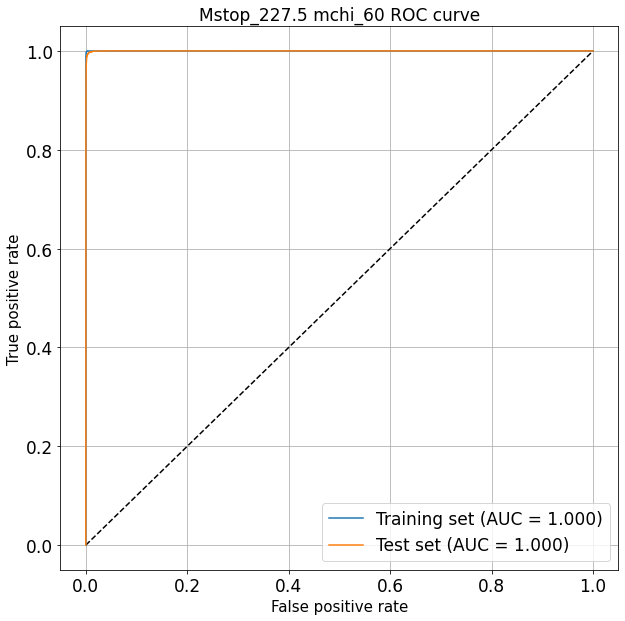

In [21]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_train, tpr_keras_train, label='Training set (AUC = {:.3f})'.format(auc_keras_train))
plt.plot(fpr_keras_test , tpr_keras_test , label='Test set (AUC = {:.3f})'.format(auc_keras_test))
plt.tick_params(axis="y", labelsize=17)
plt.tick_params(axis="x", labelsize=17)
plt.xlabel('False positive rate', fontsize=15)
plt.ylabel('True positive rate' , fontsize=15)
plt.title('Mstop_227.5 mchi_60 ROC curve', fontsize=17)
plt.legend(loc='lower right', fontsize=17)
plt.grid()
#plt.savefig('ROC Mstop 227.5 Mchi 60.jpg')
plt.show()

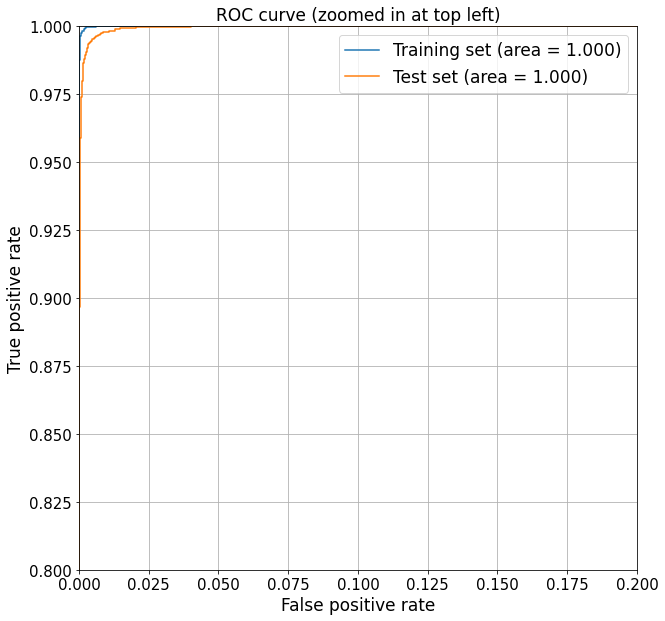

In [22]:
# Zoom in view of the upper left corner.
plt.figure(figsize=(10,10))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_train, tpr_keras_train, label='Training set (area = {:.3f})'.format(auc_keras_train))
plt.plot(fpr_keras_test , tpr_keras_test , label='Test set (area = {:.3f})'.format(auc_keras_test))
plt.ylabel('True positive rate' , fontsize=17)
plt.xlabel('False positive rate', fontsize=17)
plt.tick_params(axis="y", labelsize=15)
plt.tick_params(axis="x", labelsize=15)
plt.title('ROC curve (zoomed in at top left)', fontsize=17)
plt.legend(loc='best', fontsize=17)
plt.grid()
plt.show()

In [13]:
tt_pred  = model.predict(tt_df[35000:]) 
st_pred  = model.predict(st_df[10000:])
sat_pred = model.predict(sat_df[10000:])
vv_pred  = model.predict(vv_df[2000:]) 
si_pred  = model.predict(sig_df[17000:])

2021-04-04 23:36:43.294044: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 253456320 exceeds 10% of free system memory.


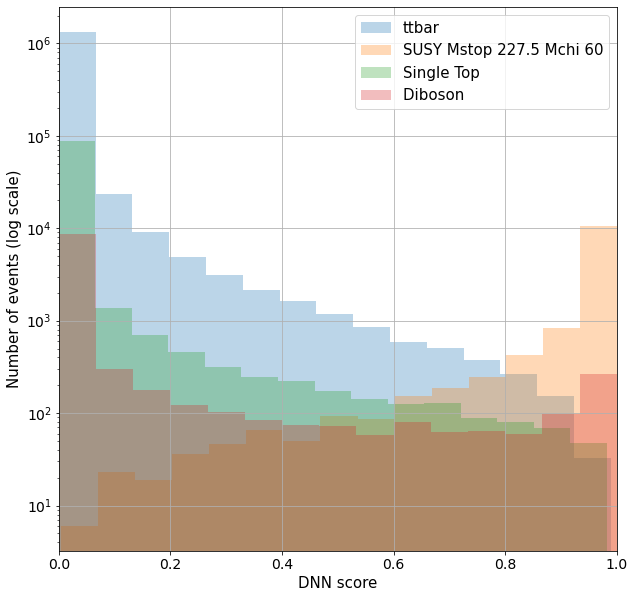

In [14]:
plt.figure(figsize=(10,10))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(tt_pred, bins=15, alpha=0.3, label='ttbar')
plt.hist(si_pred, bins=15, alpha=0.3, label='SUSY Mstop 227.5 Mchi 60')
plt.hist(st_pred, bins=15, alpha=0.3, label='Single Top')
plt.hist(vv_pred, bins=15, alpha=0.3, label='Diboson ')
#plt.hist(sat_pred, bins=15, alpha=0.3, label='Single Antitop')
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('DNN score', fontsize=15)
plt.ylabel('Number of events (log scale)', fontsize=15)
plt.grid()
plt.legend(loc='best', fontsize=15)
plt.savefig('DNN_score_Mstop_227_5_Mchi_60.jpg')

In [50]:
np.savetxt('Mstop_227_5_mchi_60_SUSY_pred.txt', si_pred)
np.savetxt('Mstop_227_5_mchi_60_tt_pred.txt'  , tt_pred)
np.savetxt('Mstop_227_5_mchi_60_st_pred.txt'  , st_pred)
np.savetxt('Mstop_227_5_mchi_60_sat_pred.txt' , sat_pred)
np.savetxt('Mstop_227_5_mchi_60_vv_pred.txt'  , vv_pred)

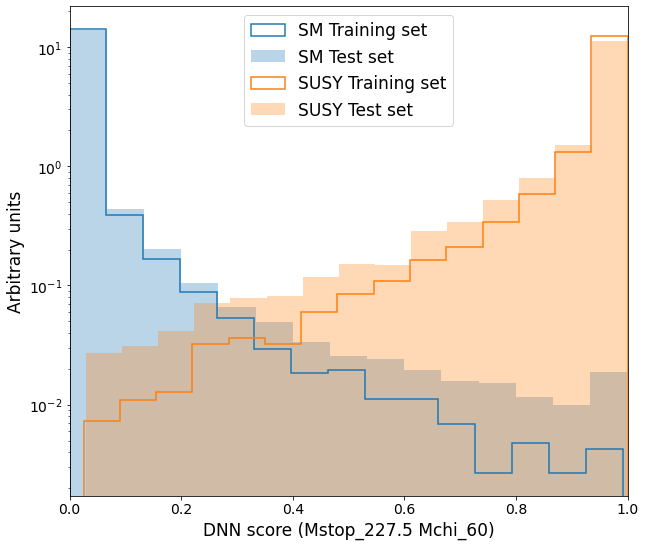

In [64]:
c0 = 'C0'
c1 = 'C1'
plt.figure(figsize=(10,9))
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.hist(y_pred_train[y_train == 0], bins=15, label='SM Training set', histtype='step', linestyle='solid', linewidth=1.5, density=True, color=c0)
plt.hist(y_pred_test[y_test == 0]  , bins=15, label='SM Test set'    , alpha=0.3, linewidth=1.5, density=True , color=c0)
plt.hist(y_pred_train[y_train == 1], bins=15, label='SUSY Training set', histtype='step' , linestyle='solid', linewidth=1.5, density=True, color=c1)
plt.hist(y_pred_test[y_test == 1]  , bins=15, label='SUSY Test set ', alpha=0.3, linewidth=1.5, density=True, color=c1)

plt.yscale('log')
#plt.ylim(0.1, 40)
plt.xlim(0,1)
plt.xlabel('DNN score (Mstop_227.5 Mchi_60)', fontsize=17)
plt.ylabel('Arbitrary units', fontsize=17)
plt.legend(loc='upper center', fontsize=17)
#plt.savefig('Train vs test Mstop_227.5 Mchi_60.jpg')

In [66]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()
    sns.set(font_scale=1.4)
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Add diverging colormap from red to blue
    #cmap = sns.diverging_palette(250, 10, as_cmap=True)
    #cmap  = sns.color_palette("coolwarm")
    cmap = sns.diverging_palette(0,255,sep=1, as_cmap=True)
                                 
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        hm = sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)
        plt.title('Correlation matrix for input features', fontsize=30)
        plt.savefig('ip_features_corr.png')
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax, vmin=-1, vmax=1)

/home/amandeephy/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amandeephy/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


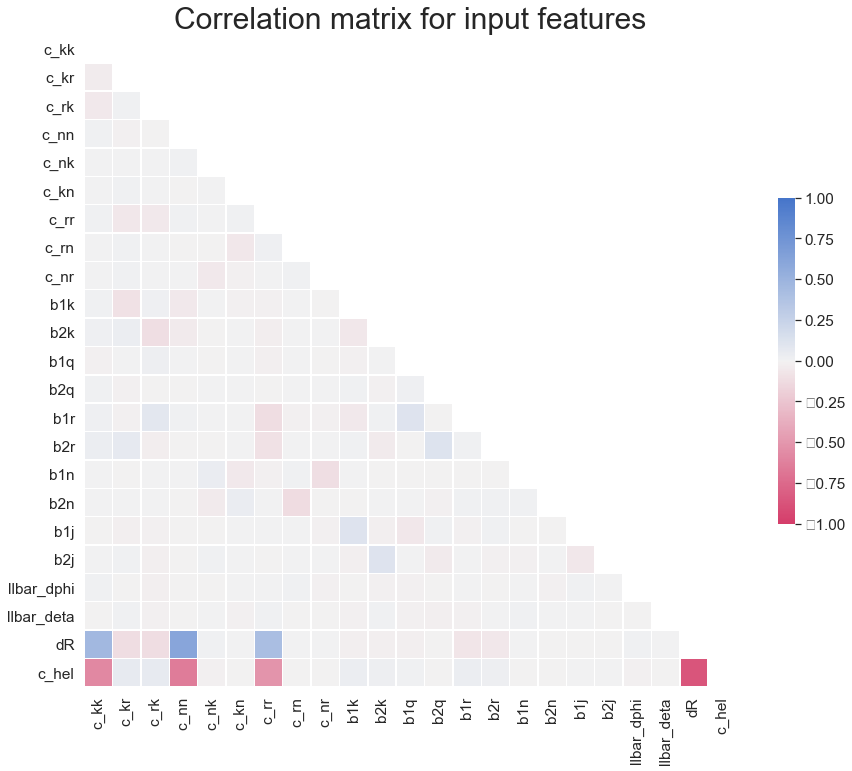

In [74]:
CorrMtx(corr, dropDuplicates = True)

In [73]:
corr = sig_df_train.corr()